`Dataset Description`
Overview
The data has been split into two groups:

training set (train.csv)
test set (test.csv)
The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

We also include gender_submission.csv, a set of predictions that assume all and only female passengers survive, as an example of what a submission file should look like.

Data Dictionary
Variable	Definition	Key
survival	Survival	0 = No, 1 = Yes
pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
sex	Sex
Age	Age in years
sibsp	# of siblings / spouses aboard the Titanic
parch	# of parents / children aboard the Titanic
ticket	Ticket number
fare	Passenger fare
cabin	Cabin number
embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton
Variable Notes
pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower
age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5
sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)
parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [4]:
Titanic_data=pd.read_csv("/content/train.csv")

In [5]:
Titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
Titanic_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [7]:
Titanic_data.shape

(891, 12)

In [8]:
Titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
Titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
Titanic_data["Age"].fillna(Titanic_data["Age"].mean(),inplace=True)
Titanic_data["Embarked"].fillna(Titanic_data["Embarked"].mode()[0],inplace=True)

In [11]:
Titanic_data.drop(columns="Cabin",axis=1,inplace=True)

In [12]:
Titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

##Data Visualzation##

In [13]:
Titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [35]:
gender = Titanic_data['Sex'].value_counts()
gender

Sex
1    577
0    314
Name: count, dtype: int64

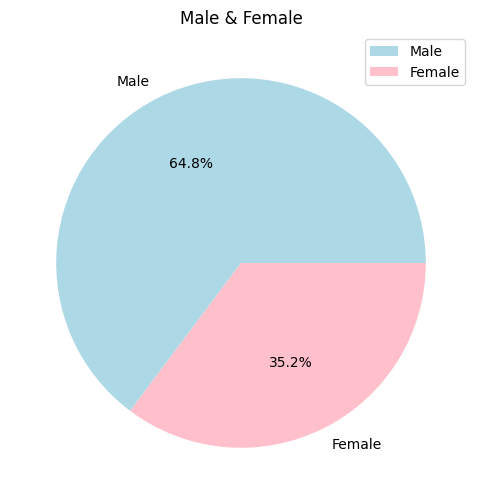

In [36]:
plt.figure(figsize=(10,6))
plt.pie(gender, labels=['Male', 'Female'] ,autopct='%.1f%%', colors=['lightblue','pink'])
plt.legend()
plt.title('Male & Female')
plt.show()

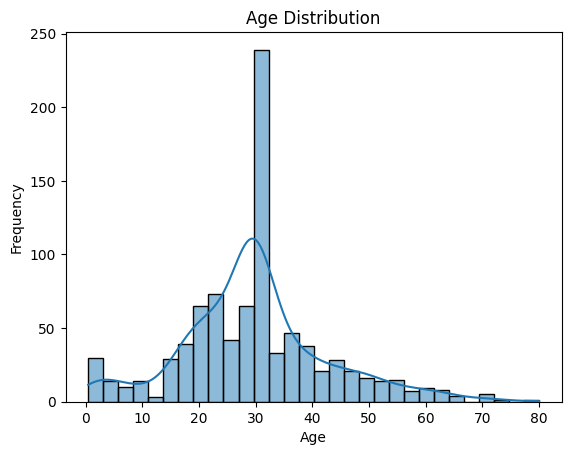

In [37]:
sns.histplot(data=Titanic_data, x='Age', bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [14]:
varibaless=['Ticket', 'Embarked', 'Sex']

data distribution analysys


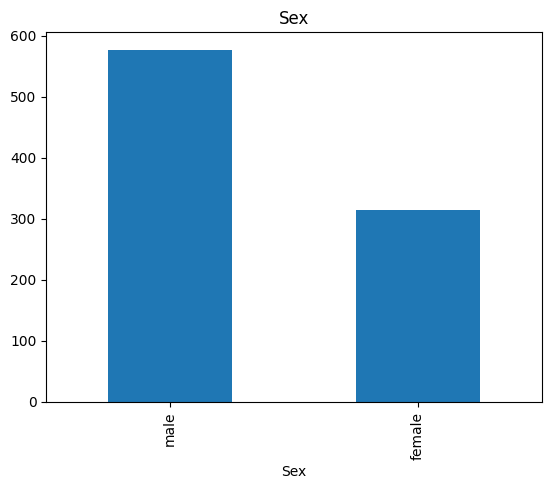

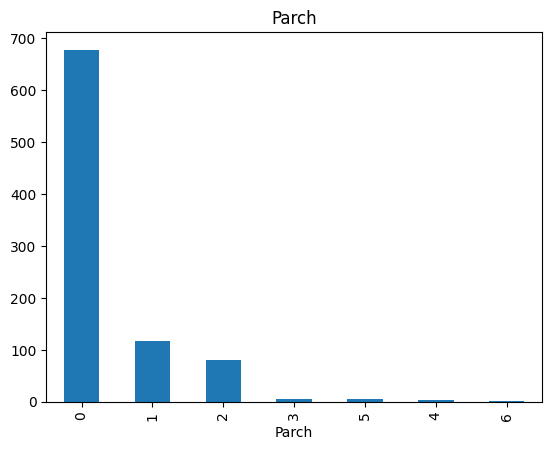

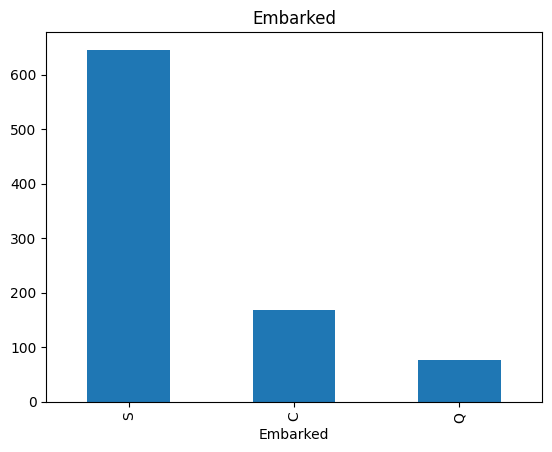

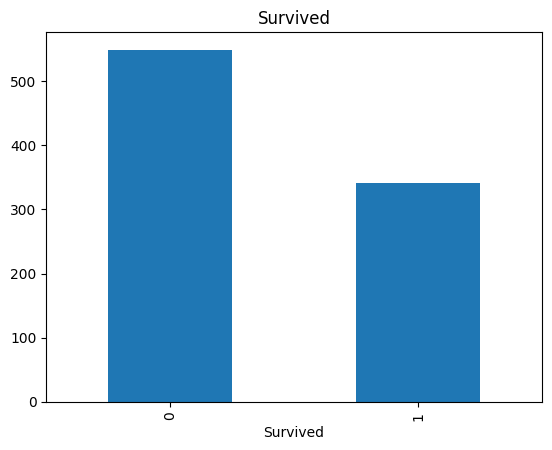

In [15]:
varibales=['Sex', 'Parch', 'Embarked','Survived']
print("data distribution analysys")
for v in varibales :
  Titanic_data=Titanic_data.sort_values(by=v)
  Titanic_data[v].value_counts().plot(kind="bar")
  plt.title(v)
  plt.show()
#عدد الأبوين / الأطفال على متن السفينة تيتانيك perch

parch	# of parents / children aboard the Titanic
fare	Passenger fare

embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

survival	Survival	0 = No, 1 = Yes

<Axes: xlabel='Sex', ylabel='count'>

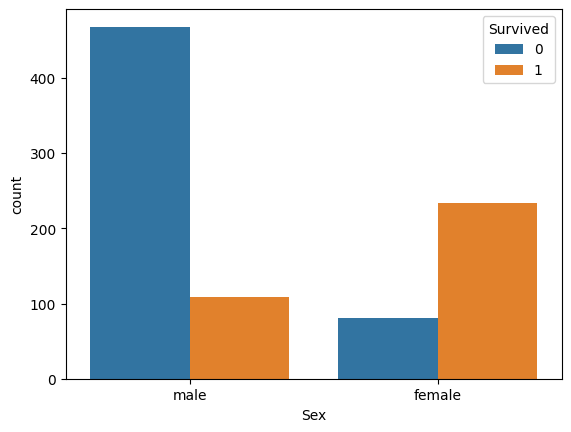

In [16]:
sns.countplot(x='Sex', hue='Survived', data=Titanic_data)

<Axes: xlabel='Pclass', ylabel='count'>

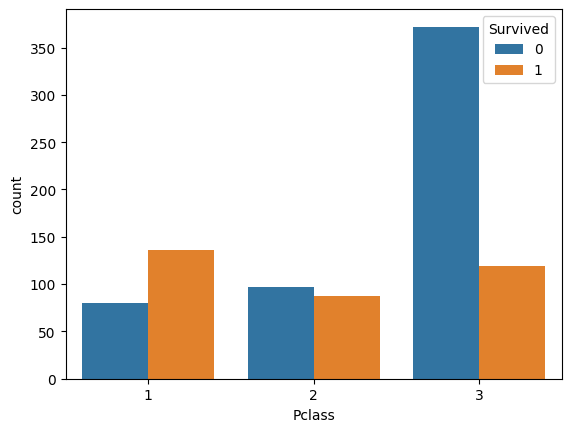

In [17]:
sns.countplot(x='Pclass', hue='Survived', data=Titanic_data)

<Axes: xlabel='Embarked', ylabel='count'>

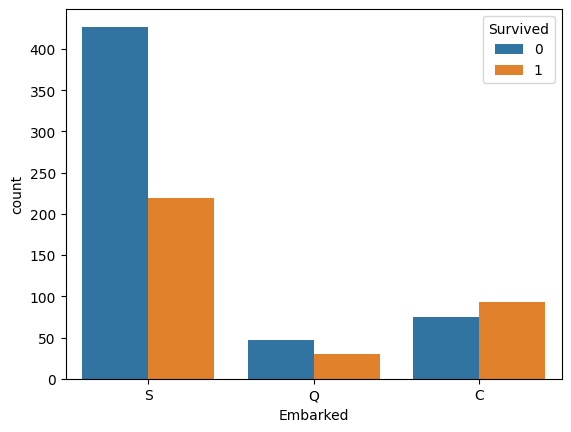

In [18]:
sns.countplot(x='Embarked', hue='Survived', data=Titanic_data)

In [19]:
Titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

Variables pairplot:


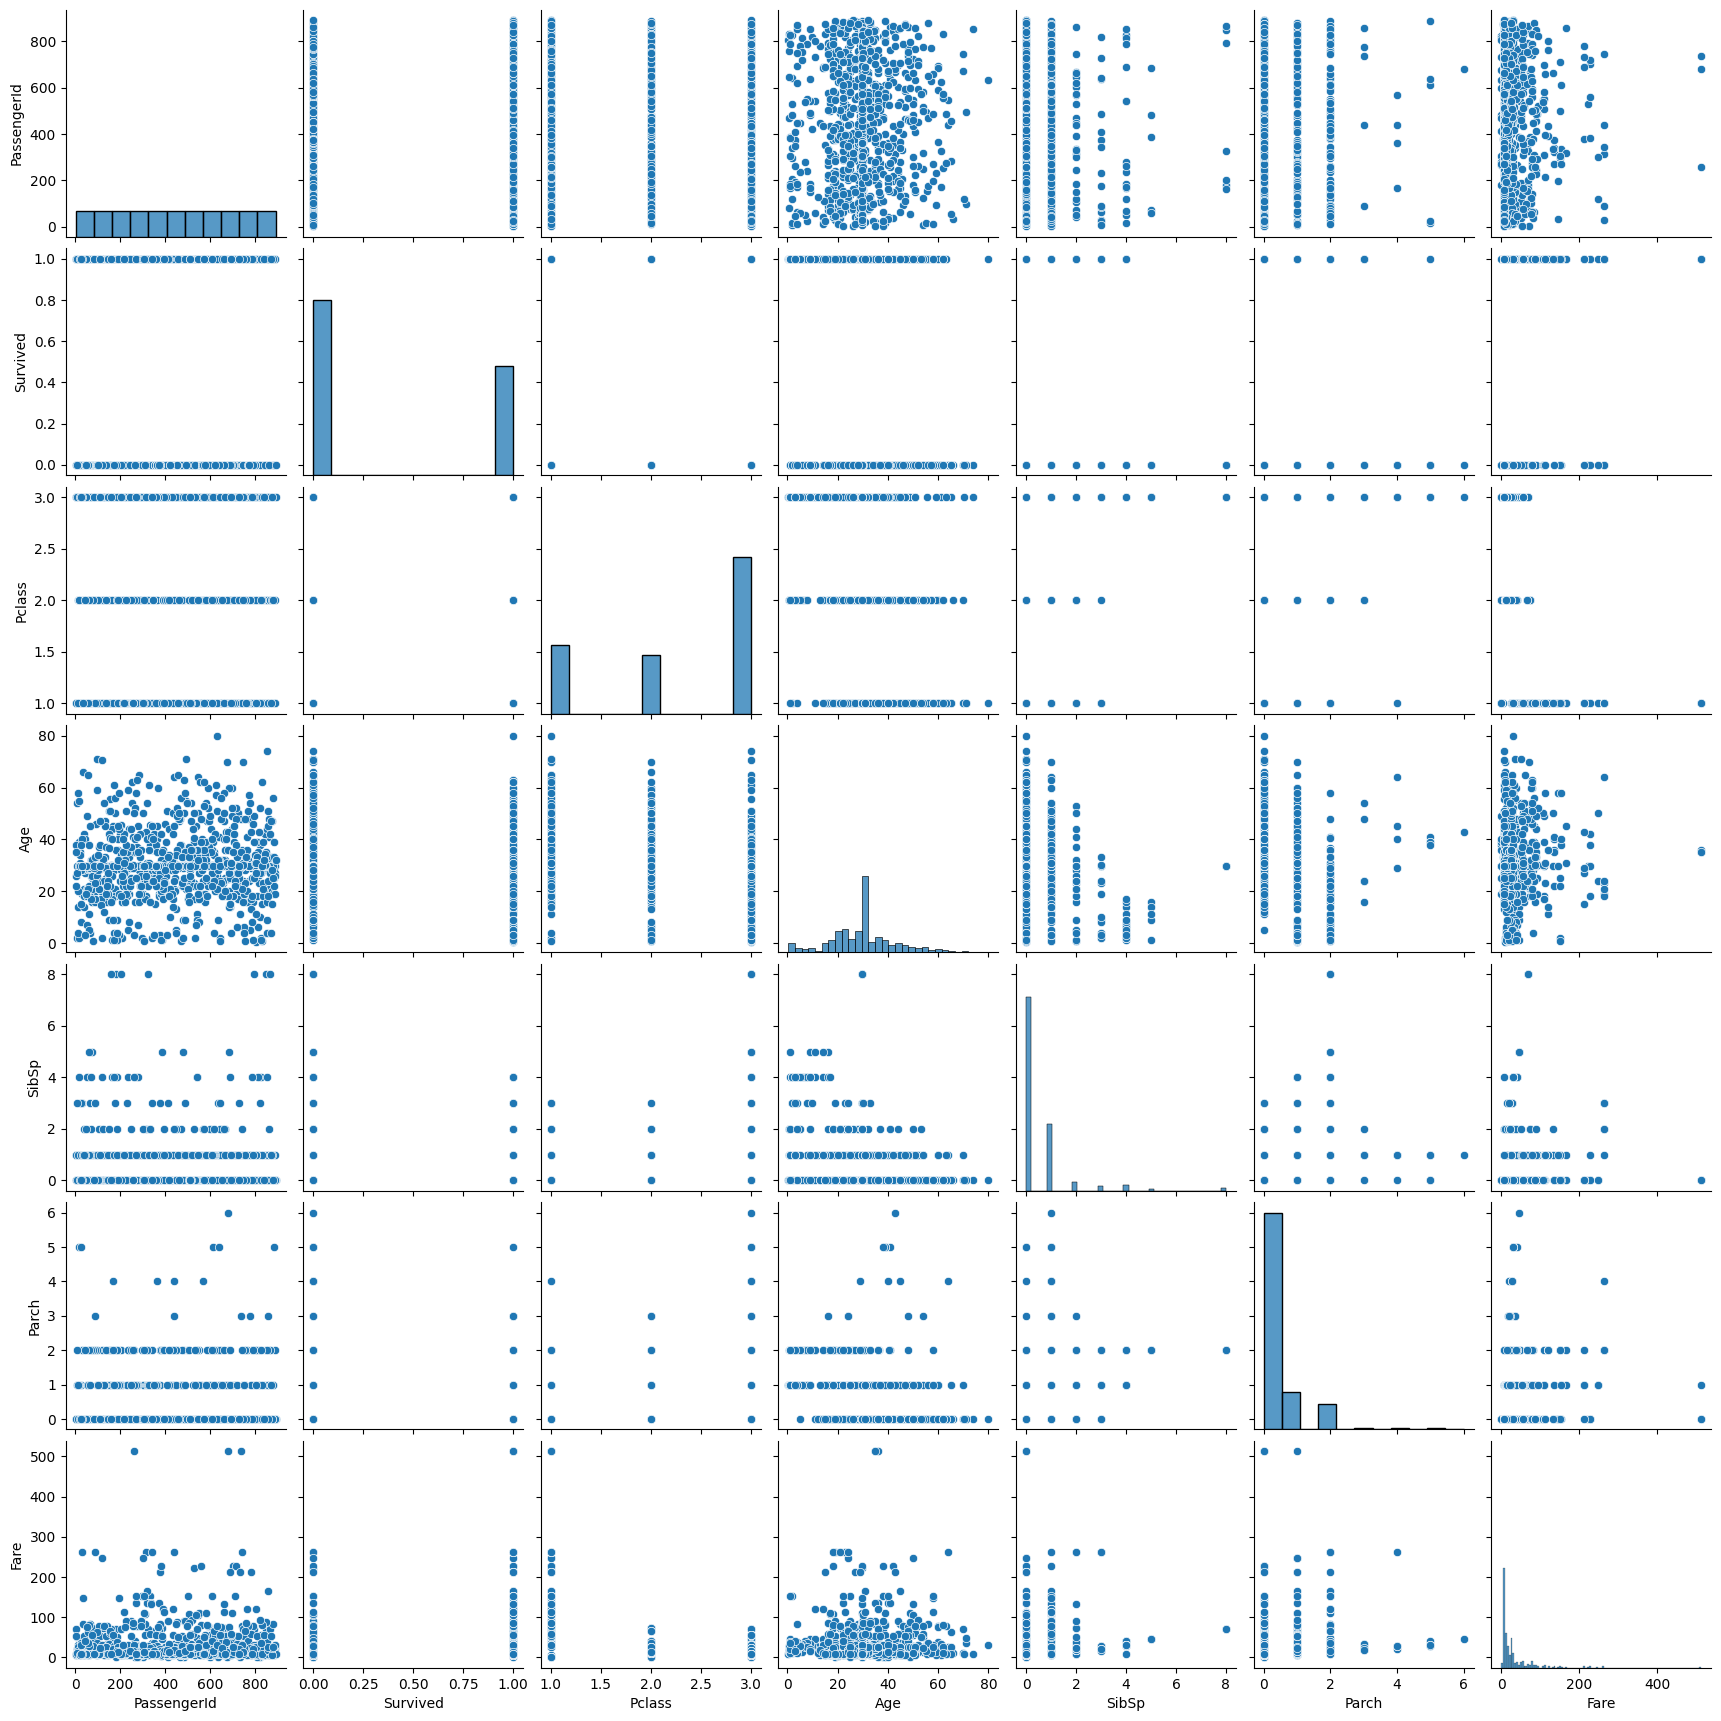

In [20]:
#variables pairplot
print('Variables pairplot:')
variables = ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked']
sns_plot = sns.pairplot(Titanic_data[variables])
plt.show()

#Separating feature &  target

In [21]:
en=LabelEncoder()

Titanic_data["Sex"]=en.fit_transform(Titanic_data["Sex"])
Titanic_data["Embarked"]=en.fit_transform(Titanic_data["Embarked"])
Titanic_data["Ticket"]=en.fit_transform(Titanic_data["Ticket"])

In [22]:
Titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 614 to 215
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    int64  
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    int64  
dtypes: float64(2), int64(8), object(1)
memory usage: 83.5+ KB


In [23]:
x=Titanic_data.drop(columns=['PassengerId','Name',"Survived"],axis=1)
y=Titanic_data["Survived"]

In [24]:
x

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
614,3,1,35.000000,0,0,431,8.0500,2
867,1,1,31.000000,0,0,590,50.4958,2
868,3,1,29.699118,0,0,309,9.5000,2
826,3,1,29.699118,0,0,80,56.4958,2
652,3,1,21.000000,0,0,512,8.4333,2
...,...,...,...,...,...,...,...,...
22,3,0,15.000000,0,0,278,8.0292,1
690,1,1,31.000000,1,0,89,57.0000,2
573,3,0,29.699118,0,0,77,7.7500,1
509,3,1,26.000000,0,0,80,56.4958,2


In [25]:
y

614    0
867    0
868    0
826    0
652    0
      ..
22     1
690    1
573    1
509    1
215    1
Name: Survived, Length: 891, dtype: int64

spliting the data into tranind data &test

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

Model
GradientBoostingClassifier

In [43]:
model_Titanic=gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
model_Titanic.fit(x_train,y_train)
train_predict=model_Titanic.predict(x_train)
test_predict=model_Titanic.predict(x_test)

In [44]:
# Train acc
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(y_train, train_predict))
print(confusion_matrix(y_train,  train_predict))
print(classification_report(y_train, train_predict))

0.8721910112359551
[[413  26]
 [ 65 208]]
              precision    recall  f1-score   support

           0       0.86      0.94      0.90       439
           1       0.89      0.76      0.82       273

    accuracy                           0.87       712
   macro avg       0.88      0.85      0.86       712
weighted avg       0.87      0.87      0.87       712



In [45]:
# TEst acc
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(y_test, test_predict))
print(confusion_matrix(y_test,  test_predict))
print(classification_report(y_test, test_predict))

0.8547486033519553
[[103   7]
 [ 19  50]]
              precision    recall  f1-score   support

           0       0.84      0.94      0.89       110
           1       0.88      0.72      0.79        69

    accuracy                           0.85       179
   macro avg       0.86      0.83      0.84       179
weighted avg       0.86      0.85      0.85       179

